### Columns and Data Types:

date (datetime64): The date and time the measurements were recorded.

temperature (int64): The recorded temperature in degrees Celsius.

humidity (int64): The percentage of humidity in the environment.

water_level (int64): The water level as a percentage.

N (int64): The nitrogen level in the soil, scaled from 0 to 255.

P (int64): The phosphorus level in the soil, scaled from 0 to 255.

K (int64): The potassium level in the soil, scaled from 0 to 255.

Fan_actuator_OFF (float64): Indicator for the fan actuator if it is off (0 or 1).

Fan_actuator_ON (float64): Indicator for the fan actuator if it is on (0 or 1).

Watering_plant_pump_OFF (float64): Indicator for the plant watering pump if it is off (0 or 1).

Watering_plant_pump_ON (float64): Indicator for the plant watering pump if it is on (0 or 1).

Water_pump_actuator_OFF (float64): Indicator for the water pump actuator if it is off (0 or 1).

Water_pump_actuator_ON (float64): Indicator for the water pump actuator if it is on (0 or 1).

### Objective:

To use the feature labels in predicting the Nitrogen level in a farm field as the target label

In [1]:
# Importing Frameworks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading in IoT data
data = pd.read_csv("IoTProcessed_Data.csv")
# Checking the first 5 rows & column headers
data.head()

,date,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
0,2024-02-08 06:10:00,41,63,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
1,2024-02-08 06:15:00,41,59,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
2,2024-02-08 06:20:00,41,62,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
3,2024-02-08 06:05:00,40,60,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
4,2024-02-08 06:00:00,39,61,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0


### Data Visualization

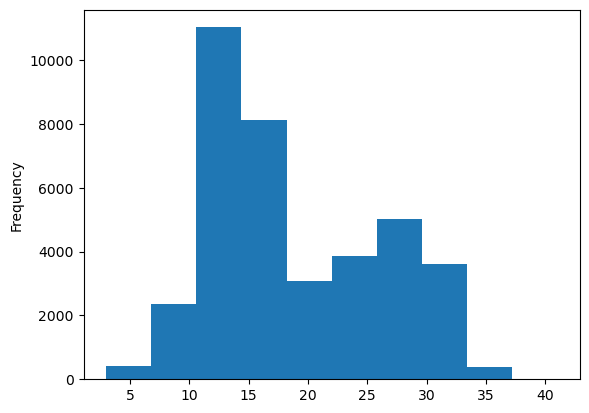

In [8]:
# Plotting the "tempreature" column
data["tempreature"].plot.hist();

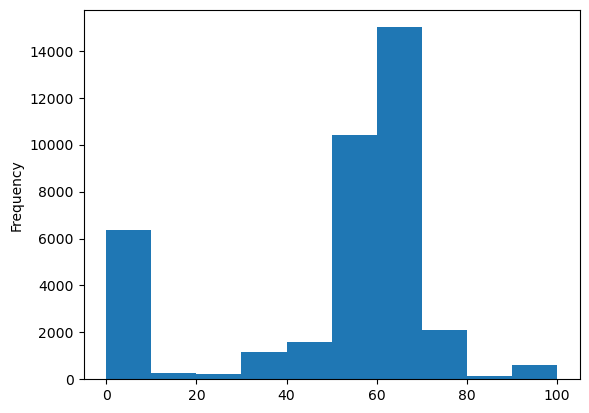

In [18]:
# Plotting humidity levels
data["humidity"].plot.hist();

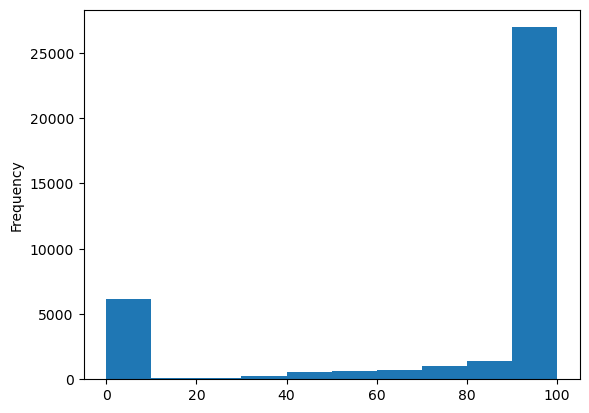

In [12]:
# Plotting "Water" level
data["water_level"].plot.hist();

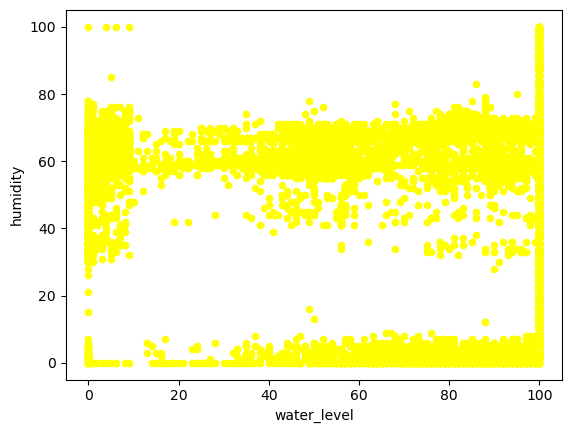

In [26]:
# Plotting the "water_level" by humidity
data.plot(x="water_level", y="humidity", kind='scatter', color='Yellow');

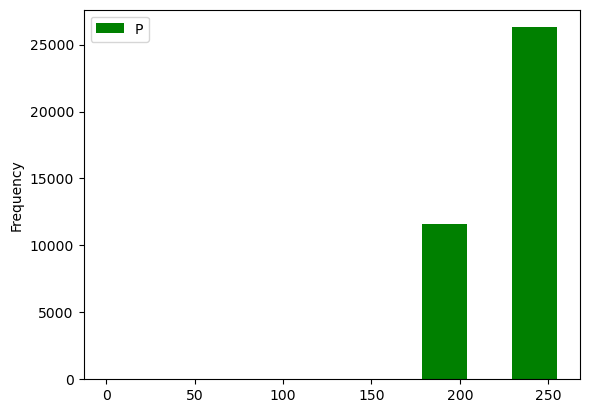

In [25]:
# Plotting "phosphorus" level by "temperature"
data.plot(x="tempreature", y="P", kind='hist', color='Green');

In [30]:
# Aanalyzing distribution of data in the target column "N"
data["N"].value_counts()

N
255    26294
178     8137
185     2365
183      937
184      184
0          3
140        1
176        1
Name: count, dtype: int64

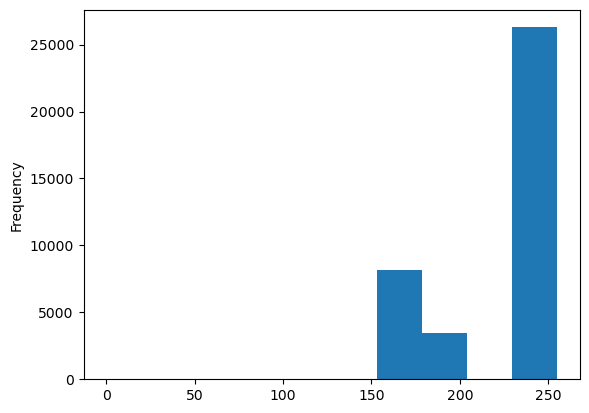

In [31]:
data["N"].plot.hist();

### Preprocessing

In [13]:
# Checking for missing values in the data
data.isna().sum()

date                       2
tempreature                0
humidity                   0
water_level                0
N                          0
P                          0
K                          0
Fan_actuator_OFF           0
Fan_actuator_ON            0
Watering_plant_pump_OFF    0
Watering_plant_pump_ON     0
Water_pump_actuator_OFF    0
Water_pump_actuator_ON     0
dtype: int64

In [33]:
# Dropping missing values in "date" column
data.dropna(inplace=True)

data.isna().sum()

date                       0
tempreature                0
humidity                   0
water_level                0
N                          0
P                          0
K                          0
Fan_actuator_OFF           0
Fan_actuator_ON            0
Watering_plant_pump_OFF    0
Watering_plant_pump_ON     0
Water_pump_actuator_OFF    0
Water_pump_actuator_ON     0
dtype: int64

In [34]:
# Checking for non-numeric datatypes
data.dtypes

date                        object
tempreature                  int64
humidity                     int64
water_level                  int64
N                            int64
P                            int64
K                            int64
Fan_actuator_OFF           float64
Fan_actuator_ON            float64
Watering_plant_pump_OFF    float64
Watering_plant_pump_ON     float64
Water_pump_actuator_OFF    float64
Water_pump_actuator_ON     float64
dtype: object

In [35]:
# Splitting data into features and target

x = data.drop("N", axis=1)
y = data["N"]

In [36]:
# Converting "date" column to numerical using OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ["date"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_feature)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(x)
transformed_X

<37920x28693 sparse matrix of type '<class 'numpy.float64'>'
	with 335759 stored elements in Compressed Sparse Row format>

In [39]:
# Model design
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor

x_train, x_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.3)
# Using SGDRegressor
SGD_reg = SGDRegressor()
SGD_reg.fit(x_train, y_train)
SGD_reg.score(x_test, y_test)

-2.6646977708840154e+22

In [41]:
# Using RandomForest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
rf_reg.score(x_test, y_test)

0.9997471425553763

### Evaluating the RandomForestRegressor Model

In [43]:
# Making predictions with model
y_preds = rf_reg.predict(x_test)

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_poisson_deviance

mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)
mpd = mean_poisson_deviance(y_test, y_preds)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"r2_score: {r2}")
print(f"Mean Poisson Deviance: {mpd}")

Mean Absolute Error: 0.006065400843881859
Mean Squared Error: 0.3083331047819972
r2_score: 0.9997471425553763
Mean Poisson Deviance: 0.010363165112166775


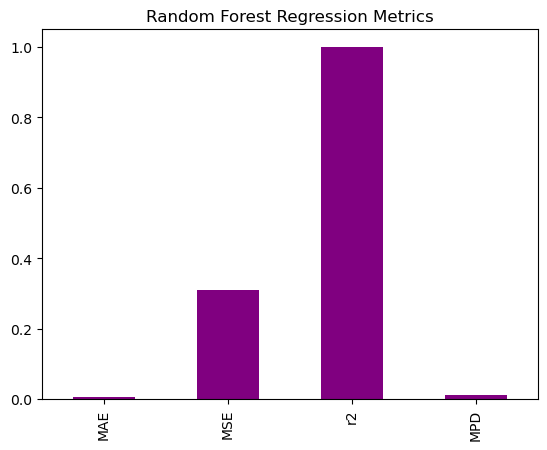

In [48]:
# Visulaizing evaluation metrics
rf_metrics = pd.DataFrame({"MAE": mae,
                           "MSE": mse,
                           "r2": r2,
                           "MPD": mpd},
                           index=[-4])

rf_metrics.T.plot.bar(title="Random Forest Regression Metrics",
                      color="Purple",
                      legend=False);

### Saving the Random Forest Regression Model

In [49]:
from joblib import load, dump
dump(rf_reg, filename="Nitrogen_level_regression.joblib")

['Nitrogen_level_regression.joblib']